In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from math import pi, sqrt
from proposal_code import tiles, all_craters, plot_craters

In [5]:
def get_label_map(prediction_map, threshold=.5):
    """Takes a pixel-wise prediction map and returns a matrix
    of unique objects on the map. Threshold is a hyperparameter
    for crater/non-crater pixel determination. Higher threshold
    may help distinguish merged crater detections.
    """
    filtered = np.where(prediction > threshold, 1, 0)
    labels = measure.label(filtered, neighbors=4, background=0)
    return labels

def get_crater_pixels(label_matrix, idx):
    """Takes a label matrix and a number and gets all the
    pixel locations from that crater object.
    """
    result = np.argwhere(np.where(label_matrix==idx, 1, 0))
    return result

def get_pixel_objects(label_matrix):
    """Takes the label matrix and returns a list of objects.
    Each element in the list is a unique object, defined
    by an array of pixel locations belonging to it.
    """
    objects = []
    idx = 1
    result = np.array([0])
    while True:
        result = get_crater_pixels(label_matrix, idx)
        if len(result) == 0:
            break
        objects.append(result)
        idx += 1
    print('Found {} objects in image.'.format(len(objects)))
    return objects

def get_crater_proposals(prediction_map):
    """Takes a pixel-wise prediction map and returns a list of
    crater proposals as x, y, d.
    """
    label_matrix = get_label_map(prediction_map)
    proposals = get_pixel_objects(label_matrix)
    result = []
    for proposal in proposals:
        area = len(proposal)
        y_locs = [x[0] for x in proposal]
        x_locs = [x[1] for x in proposal]
        x_mean = round(np.mean(x_locs))
        y_mean = round(np.mean(y_locs))
        d = 2*sqrt(area/pi)
        result.append((x_mean, y_mean, d))
    return result

In [6]:
prediction = np.load('./tiles/predictions/tile_2_25.npy')
proposals = get_crater_proposals(prediction)

Found 748 objects in image.


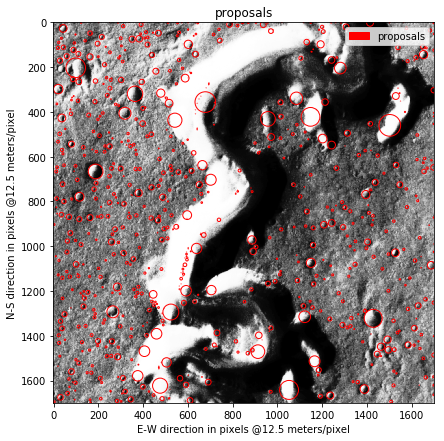

In [7]:
tile = tiles['2_25']
craters = {
    'proposals': proposals
}
plot_craters(tile, craters)